##Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TFM/datasetSeleccionadasPreClustering.csv', decimal='.')

# Columnas relevantes
df_season = df[['season', 'home_team', 'away_team', 'result_match']]


In [ ]:
#Eliminacion promedios y columnas que no se van a utilizar
eliminacion_clumnas_menor_60 = ['id', 'home_clearances', 'home_fouls_conceded', 'home_offsides', 'home_tackles', 'away_clearances', 'away_fouls_conceded',
                                'away_offsides', 'away_tackles', 'clearances_avg_H', 'fouls_conceded_avg_H', 'offsides_avg_H', 'tackles_avg_H',
                                'fouls_conceded_avg_A', 'offsides_avg_A', 'tackles_avg_A']
df.drop(eliminacion_clumnas_menor_60, axis=1, inplace=True)

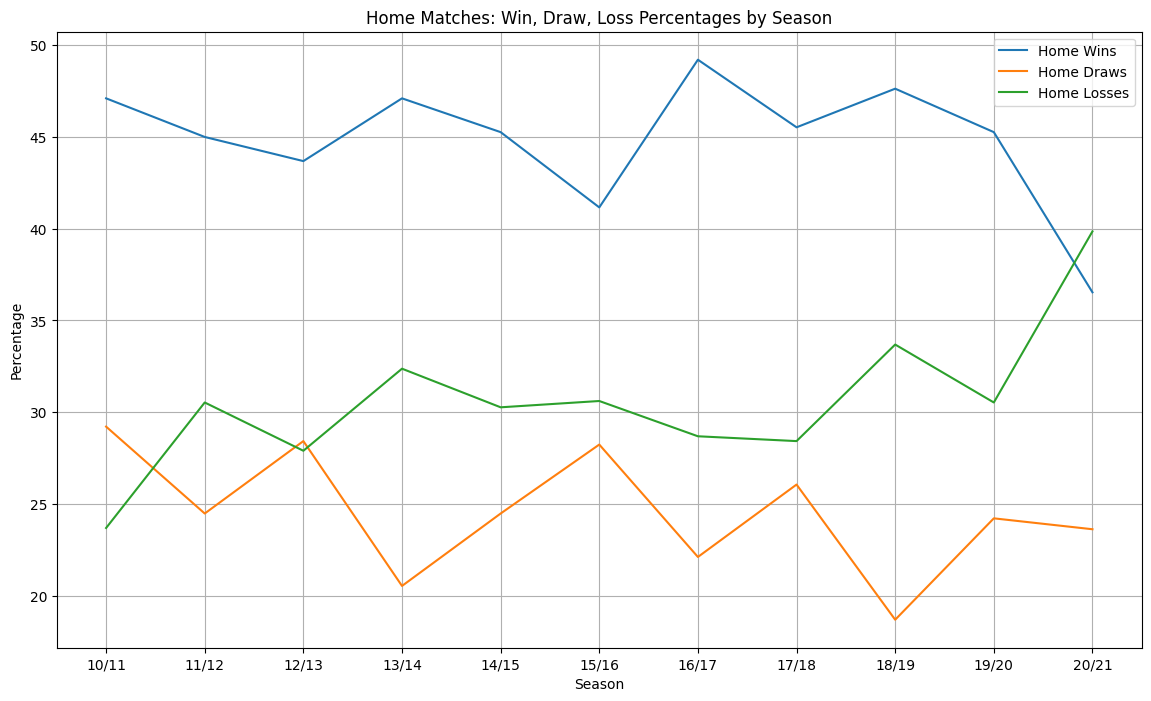

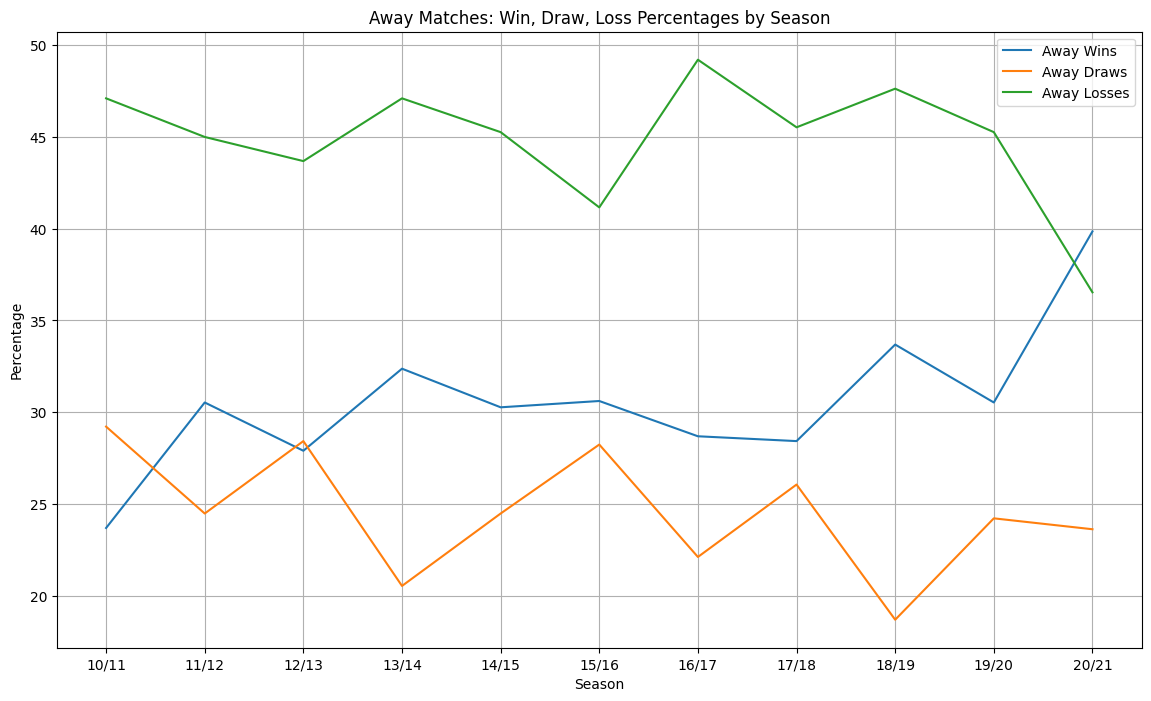

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

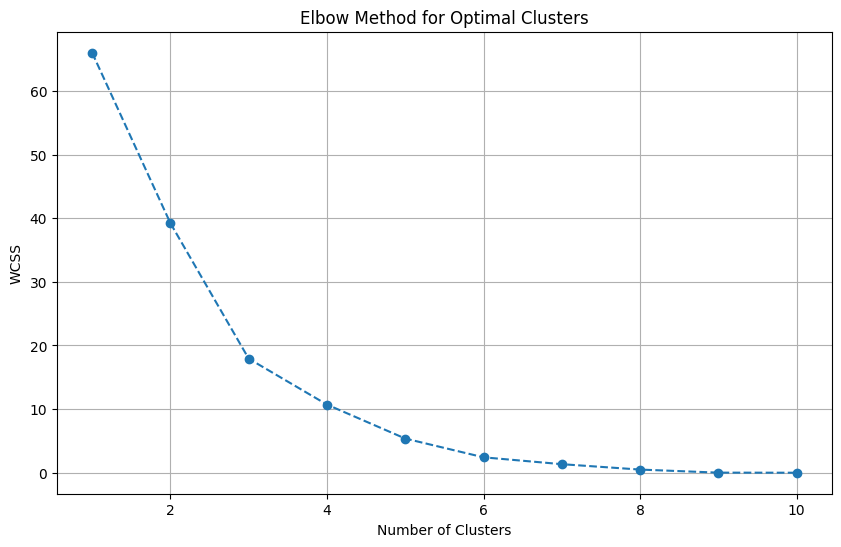

Silhouette Score: 0.39769598082593804


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,season,home_wins,home_draws,home_losses,away_wins,away_draws,away_losses,total_home_matches,total_away_matches,home_win_percentage,home_draw_percentage,home_loss_percentage,away_win_percentage,away_draw_percentage,away_loss_percentage,cluster,cluster_description
0,10/11,179,111,90,90,111,179,380,380,47.105263,29.210526,23.684211,23.684211,29.210526,47.105263,2,Muy superior como local
1,11/12,171,93,116,116,93,171,380,380,45.000000,24.473684,30.526316,30.526316,24.473684,45.000000,2,Muy superior como local
2,12/13,166,108,106,106,108,166,380,380,43.684211,28.421053,27.894737,27.894737,28.421053,43.684211,2,Muy superior como local
3,13/14,179,78,123,123,78,179,380,380,47.105263,20.526316,32.368421,32.368421,20.526316,47.105263,1,Rendimiento consistente
4,14/15,172,93,115,115,93,172,380,380,45.263158,24.473684,30.263158,30.263158,24.473684,45.263158,2,Muy superior como local


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = {
    'season': [],
    'home_wins': [],
    'home_draws': [],
    'home_losses': [],
    'away_wins': [],
    'away_draws': [],
    'away_losses': []
}

seasons = df_season['season'].unique()
for season in seasons:
    season_df = df_season[df_season['season'] == season]
    home_wins = season_df[season_df['result_match'] == 0].shape[0]
    home_draws = season_df[season_df['result_match'] == 1].shape[0]
    home_losses = season_df[season_df['result_match'] == 2].shape[0]
    away_wins = season_df[season_df['result_match'] == 2].shape[0]
    away_draws = season_df[season_df['result_match'] == 1].shape[0]
    away_losses = season_df[season_df['result_match'] == 0].shape[0]

    results['season'].append(season)
    results['home_wins'].append(home_wins)
    results['home_draws'].append(home_draws)
    results['home_losses'].append(home_losses)
    results['away_wins'].append(away_wins)
    results['away_draws'].append(away_draws)
    results['away_losses'].append(away_losses)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='season')

# Calcular el total de partidos en casa y fuera por temporada
results_df['total_home_matches'] = results_df['home_wins'] + results_df['home_draws'] + results_df['home_losses']
results_df['total_away_matches'] = results_df['away_wins'] + results_df['away_draws'] + results_df['away_losses']

# Calcular porcentajes
results_df['home_win_percentage'] = (results_df['home_wins'] / results_df['total_home_matches']) * 100
results_df['home_draw_percentage'] = (results_df['home_draws'] / results_df['total_home_matches']) * 100
results_df['home_loss_percentage'] = (results_df['home_losses'] / results_df['total_home_matches']) * 100

results_df['away_win_percentage'] = (results_df['away_wins'] / results_df['total_away_matches']) * 100
results_df['away_draw_percentage'] = (results_df['away_draws'] / results_df['total_away_matches']) * 100
results_df['away_loss_percentage'] = (results_df['away_losses'] / results_df['total_away_matches']) * 100


plt.figure(figsize=(14, 8))
plt.plot(results_df['season'], results_df['home_win_percentage'], label='Home Wins')
plt.plot(results_df['season'], results_df['home_draw_percentage'], label='Home Draws')
plt.plot(results_df['season'], results_df['home_loss_percentage'], label='Home Losses')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Home Matches: Win, Draw, Loss Percentages by Season')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 8))
plt.plot(results_df['season'], results_df['away_win_percentage'], label='Away Wins')
plt.plot(results_df['season'], results_df['away_draw_percentage'], label='Away Draws')
plt.plot(results_df['season'], results_df['away_loss_percentage'], label='Away Losses')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Away Matches: Win, Draw, Loss Percentages by Season')
plt.legend()
plt.grid(True)
plt.show()

# Columnas clustering
clustering_data = results_df[['home_win_percentage', 'home_draw_percentage', 'home_loss_percentage', 'away_win_percentage', 'away_draw_percentage', 'away_loss_percentage']]

scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_clustering_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# K-Means con el número óptimo de clusters (3)
kmeans = KMeans(n_clusters=3, random_state=42)
results_df['cluster'] = kmeans.fit_predict(scaled_clustering_data)


silhouette_avg = silhouette_score(scaled_clustering_data, results_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


cluster_descriptions = {
    0: "Rendimiento inferior como local",
    1: "Rendimiento consistente",
    2: "Muy superior como local"
}

results_df['cluster_description'] = results_df['cluster'].map(cluster_descriptions)


output_path = '/content/drive/MyDrive/TFM/seasonal_performance_home_away.csv'
results_df.to_csv(output_path, index=False)

results_df.head()


##Temporada COVID

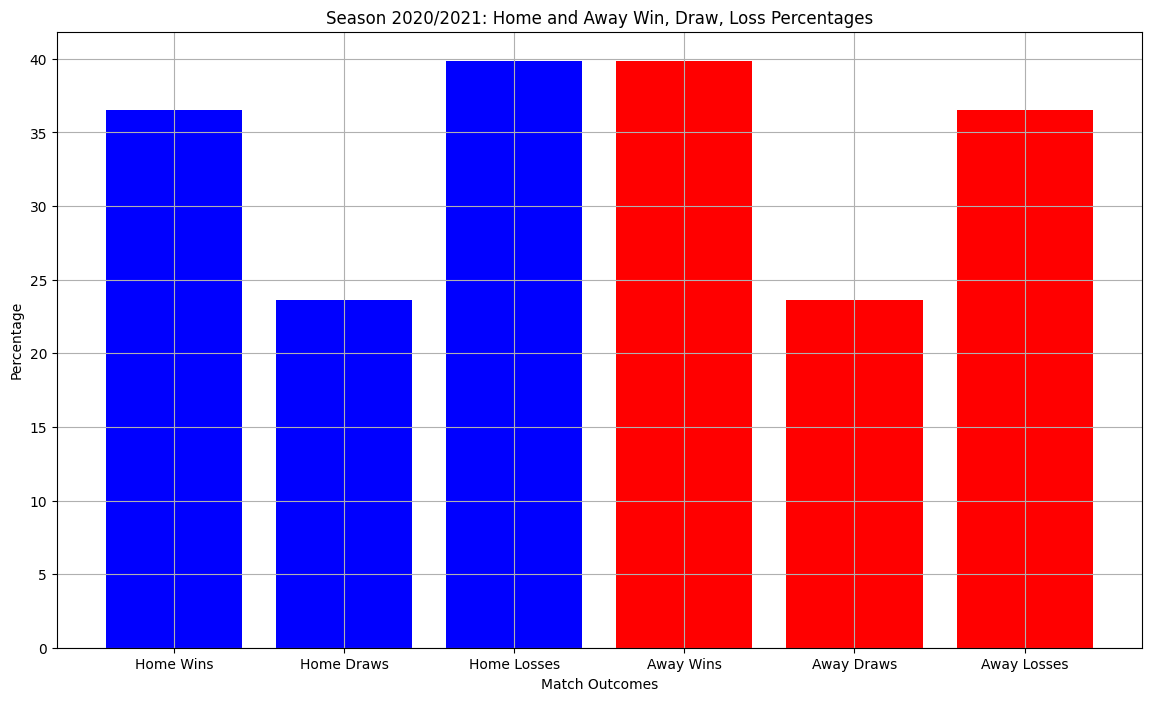

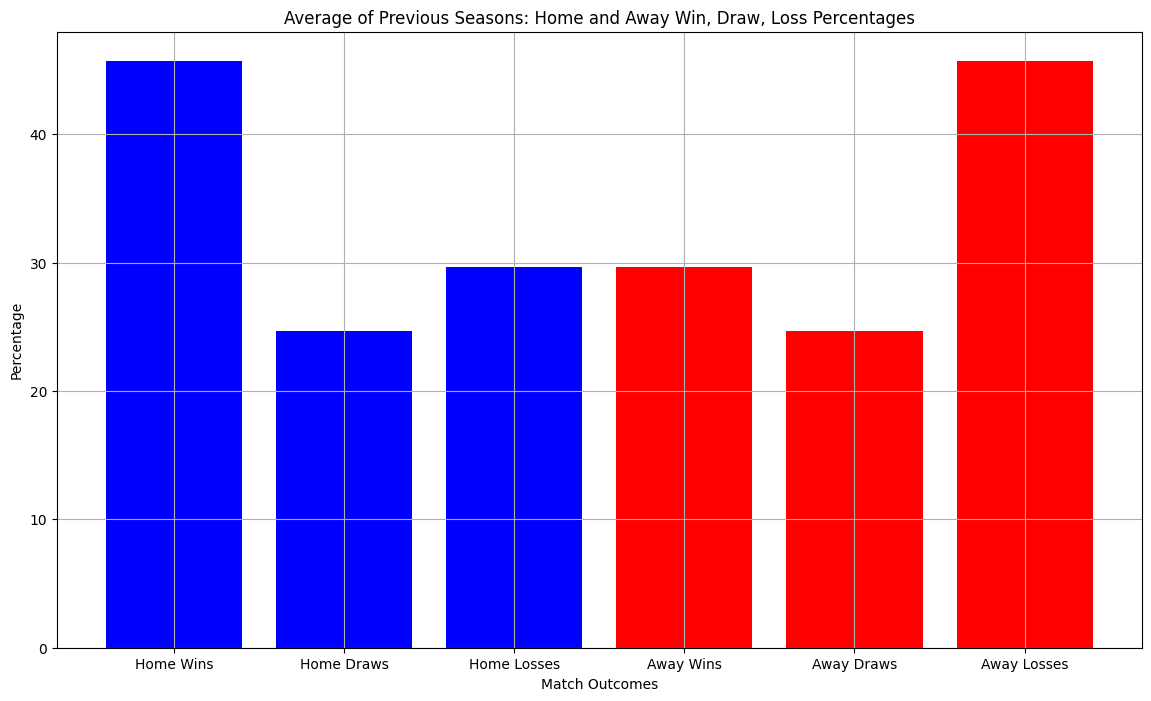

'/content/drive/MyDrive/TFM/comparison_COVID_seasonal_performance_home_away.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = {
    'season': [],
    'home_wins': [],
    'home_draws': [],
    'home_losses': [],
    'away_wins': [],
    'away_draws': [],
    'away_losses': []
}

seasons = df_season['season'].unique()
for season in seasons:
    season_df = df_season[df_season['season'] == season]
    home_wins = season_df[season_df['result_match'] == 0].shape[0]
    home_draws = season_df[season_df['result_match'] == 1].shape[0]
    home_losses = season_df[season_df['result_match'] == 2].shape[0]
    away_wins = season_df[season_df['result_match'] == 2].shape[0]
    away_draws = season_df[season_df['result_match'] == 1].shape[0]
    away_losses = season_df[season_df['result_match'] == 0].shape[0]

    results['season'].append(season)
    results['home_wins'].append(home_wins)
    results['home_draws'].append(home_draws)
    results['home_losses'].append(home_losses)
    results['away_wins'].append(away_wins)
    results['away_draws'].append(away_draws)
    results['away_losses'].append(away_losses)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='season')

# Calcular el total de partidos en casa y fuera por temporada
results_df['total_home_matches'] = results_df['home_wins'] + results_df['home_draws'] + results_df['home_losses']
results_df['total_away_matches'] = results_df['away_wins'] + results_df['away_draws'] + results_df['away_losses']

# Calcular porcentajes
results_df['home_win_percentage'] = (results_df['home_wins'] / results_df['total_home_matches']) * 100
results_df['home_draw_percentage'] = (results_df['home_draws'] / results_df['total_home_matches']) * 100
results_df['home_loss_percentage'] = (results_df['home_losses'] / results_df['total_home_matches']) * 100

results_df['away_win_percentage'] = (results_df['away_wins'] / results_df['total_away_matches']) * 100
results_df['away_draw_percentage'] = (results_df['away_draws'] / results_df['total_away_matches']) * 100
results_df['away_loss_percentage'] = (results_df['away_losses'] / results_df['total_away_matches']) * 100

# Comparar temporada 2020/2021 con promedios de temporadas anteriores
season_2021 = results_df[results_df['season'] == '20/21']
previous_seasons = results_df[results_df['season'] != '20/21']

# Calcular promedios de temporadas anteriores
average_previous_seasons = previous_seasons[['home_win_percentage', 'home_draw_percentage', 'home_loss_percentage',
                                             'away_win_percentage', 'away_draw_percentage', 'away_loss_percentage']].mean()

average_previous_seasons = average_previous_seasons.to_frame().T
average_previous_seasons['season'] = 'Promedio Anterior'

# Unir los datos de la temporada 2020/2021 con los promedios anteriores para guardarlos en un CSV
comparison_df = pd.concat([season_2021, average_previous_seasons], ignore_index=True)

# Columnas relevantes
comparison_df = comparison_df[['season', 'home_win_percentage', 'home_draw_percentage', 'home_loss_percentage',
                               'away_win_percentage', 'away_draw_percentage', 'away_loss_percentage']]

columns = ['season'] + [col for col in comparison_df.columns if col != 'season']
comparison_df = comparison_df[columns]

output_comparison_path_local = '/content/drive/MyDrive/TFM/comparison_COVID_seasonal_performance_home_away.csv'
comparison_df.to_csv(output_comparison_path_local, index=False)

plt.figure(figsize=(14, 8))
plt.bar(['Home Wins', 'Home Draws', 'Home Losses', 'Away Wins', 'Away Draws', 'Away Losses'],
        [season_2021['home_win_percentage'].values[0], season_2021['home_draw_percentage'].values[0], season_2021['home_loss_percentage'].values[0],
         season_2021['away_win_percentage'].values[0], season_2021['away_draw_percentage'].values[0], season_2021['away_loss_percentage'].values[0]],
        color=['blue', 'blue', 'blue', 'red', 'red', 'red'])
plt.xlabel('Match Outcomes')
plt.ylabel('Percentage')
plt.title('Season 2020/2021: Home and Away Win, Draw, Loss Percentages')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
plt.bar(['Home Wins', 'Home Draws', 'Home Losses', 'Away Wins', 'Away Draws', 'Away Losses'],
        [average_previous_seasons['home_win_percentage'].values[0], average_previous_seasons['home_draw_percentage'].values[0], average_previous_seasons['home_loss_percentage'].values[0],
         average_previous_seasons['away_win_percentage'].values[0], average_previous_seasons['away_draw_percentage'].values[0], average_previous_seasons['away_loss_percentage'].values[0]],
        color=['blue', 'blue', 'blue', 'red', 'red', 'red'])
plt.xlabel('Match Outcomes')
plt.ylabel('Percentage')
plt.title('Average of Previous Seasons: Home and Away Win, Draw, Loss Percentages')
plt.grid(True)
plt.show()

output_comparison_path_local
